In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def graph_test(x, start=0.5, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

def set_approve(graph, i, j):
    return (i == 0 or not graph[i - 1, j]) and (j == 0 or not graph[i, j - 1]) and \
           (i == graph.shape[0] - 1 or not graph[i + 1, j]) and \
           (j == graph.shape[1] - 1 or not graph[i, j + 1])

def possible_changes(graph):
    changes = []
    for i in range(graph.shape[0]):
        for j in range(graph.shape[1]):
            if graph[i, j] or set_approve(graph, i, j):
                changes.append((i, j))
    return changes

def generate_state(graph):
    changes = possible_changes(graph)
    change = changes[np.random.randint(0, len(changes))]
    
    new_graph = np.array(graph)
    new_graph[change[0], change[1]] = not graph[change[0], change[1]]
    new_changes = possible_changes(new_graph)
    
    if np.random.uniform() < len(changes) / len(new_changes):
        return new_graph
    return graph

In [27]:

N = 8
graph = np.array([[False] * N] * N)
sample = []
for i in range(100000):
    sample.append(graph.sum())
    graph = generate_state(graph)
    
np.array(sample).mean()

15.34825

Text(0.5, 0, 'Итерация')

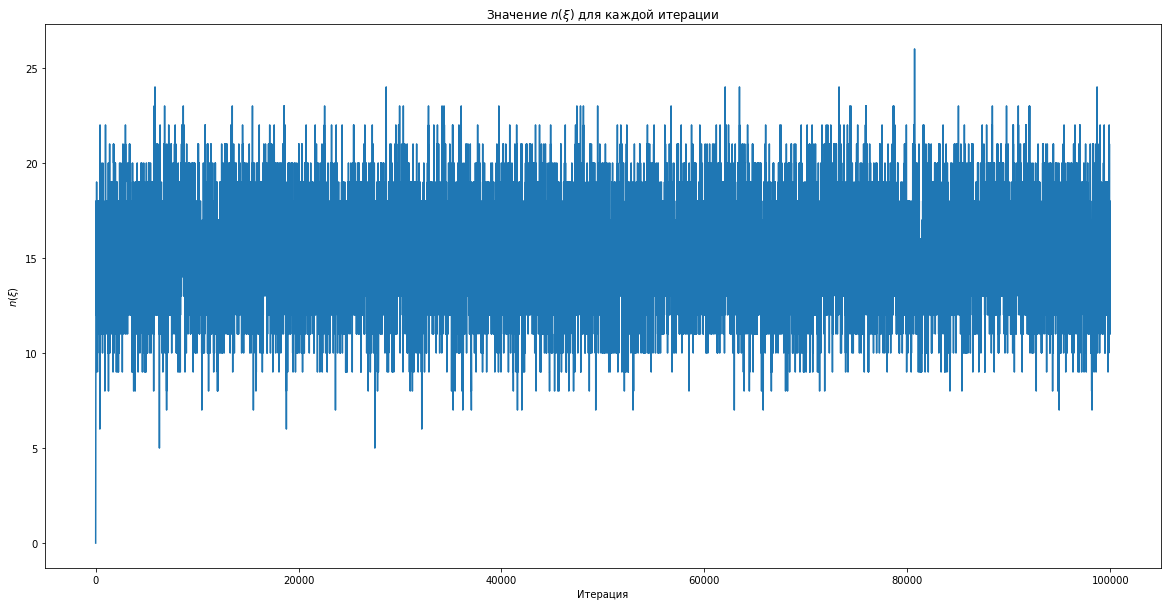

In [28]:

plt.figure(figsize=(20,10))
plt.plot(sample)
plt.title("Значение $ n(\\xi) $ для каждой итерации")
plt.ylabel("$ n(\\xi) $")
plt.xlabel("Итерация")

In [29]:
graph_test(sample[10000:])

Ttest_indResult(statistic=-16.37701847076325, pvalue=3.412073628340439e-60)

Text(0.5, 1.0, 'Распределение $ n(\\xi) $')

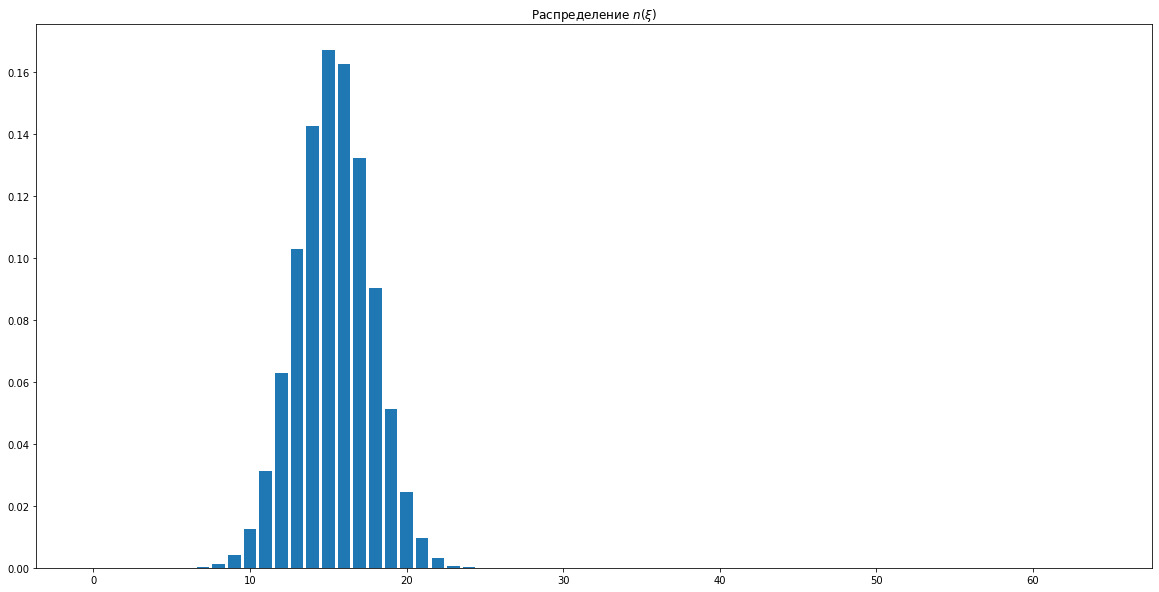

In [30]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(N**2 + 1), np.bincount(sample, minlength=N**2 + 1) / len(sample))
plt.title("Распределение $ n(\\xi) $")